# **amir mohammad ramezan naderi- 610398126**

## Table of contents
- [1- imports](#1)
- [2- dataset information](#2)
- [3- analysis](#3)

<a name='1'></a>
# 1- imports

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
		<p></p>
        ابتدا کتابخانه های مورد نظر را ایمپورت میکنیم.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

<a name='2'></a>
# 2- dataset information

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
           در این بخش ابتدا دیتا را با دستور pd.read_csv میخوانیم و سپس ۵ سطر اول آن را نمایش میدهیم.

In [2]:
df = pd.read_csv('transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        ابعاد دیتا فریم df را بدست می آوریم. همان طور که مشاهده میکنید، ۵ ستون و ۷۴۸ رکورد وجود دارد.

In [3]:
df.shape

(748, 5)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        نکته ای که در اینجا وجود دارد این است که تاثیر ۲ ویژگی Frequency (times) و Monetary (c.c. blood) بر پیشبینی کردن اهدای خون(ستون آخر) یکی میباشد، زیرا F، تعداد اهدا و M، میزان اهدا که برابر است با ضرب F در یک مقدار ثابت را نشان میدهد. 
        <br>
        پس بهتر است ستون Monetary (c.c. blood) را حذف کنیم. 

In [4]:
df.drop(columns=['Monetary (c.c. blood)'], inplace=True)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        به دلیل سهولت کار با این دیتا فریم، نام ستون آخر را به Target تغییر می دهیم.

In [5]:
df.rename(columns={'whether he/she donated blood in March 2007':'Target'}, inplace=True)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حالا با دستور df.describe مقادیر آماری 4 ویژگی مان را مانند میانگین و میانه مشاهده میکنیم.

In [6]:
df.describe()

,Recency (months),Frequency (times),Time (months),Target
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,34.282086,0.237968
std,8.095396,5.839307,24.376714,0.426124
min,0.000000,1.000000,2.000000,0.000000
25%,2.750000,2.000000,16.000000,0.000000
50%,7.000000,4.000000,28.000000,0.000000
75%,14.000000,7.000000,50.000000,0.000000
max,74.000000,50.000000,98.000000,1.000000


<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        سپس با دستور df.info، اطلاعات کلی دیتافریم را مشاهده میکنیم. همانطور که میبینید، نام ستون ها، نوع ویژگی ها و ... در زیر وجود دارد.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Recency (months)   748 non-null    int64
 1   Frequency (times)  748 non-null    int64
 2   Time (months)      748 non-null    int64
 3   Target             748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        تعداد null ها را برای هر ستون محاسبه میکنیم.

In [8]:
df.isnull().sum()

Recency (months)     0
Frequency (times)    0
Time (months)        0
Target               0
dtype: int64

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        اکنون تعداد رکورد های تکراری را با دستور df.duplicated حساب میکنیم.

In [9]:
df.duplicated().sum()

215

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        همانطور که مشاهده میکنید، ۲۱۵ سطر تکراری وجود دارد😳
        <br>
        پس باید سطر های تکراری حذف کنیم و اندیس های دیتافریم را به حالت اول برگردانیم. این کار را در ۲ خط بعدی انجام میدهیم.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.shape

(533, 4)

In [13]:
cols = ['Recency (months)', 'Frequency (times)', 'Time (months)']
for col in cols:
    print('The length of unique value in '+ col +' column is: '+str(len(df.groupby(col).size())))

The length of unique value in Recency (months) column is: 31
The length of unique value in Frequency (times) column is: 33
The length of unique value in Time (months) column is: 78


<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال چک میکنیم تعداد ۰ ها و ۱ های target به چه تعداد در دیتاست وجود دارد.

In [14]:
df.groupby('Target').size()

Target
0    384
1    149
dtype: int64

<a name='3'></a>
# 3- analysis

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال ضریب همبستگی بین ویژگی ها را هم به صورت جدولی ساده و هم به صورت نمودار heatmap مشاهده میکنیم.

In [15]:
df.corr()

,Recency (months),Frequency (times),Time (months),Target
Recency (months),1.000000,-0.212165,0.143196,-0.274799
Frequency (times),-0.212165,1.000000,0.555731,0.174570
Time (months),0.143196,0.555731,1.000000,-0.134236
Target,-0.274799,0.174570,-0.134236,1.000000


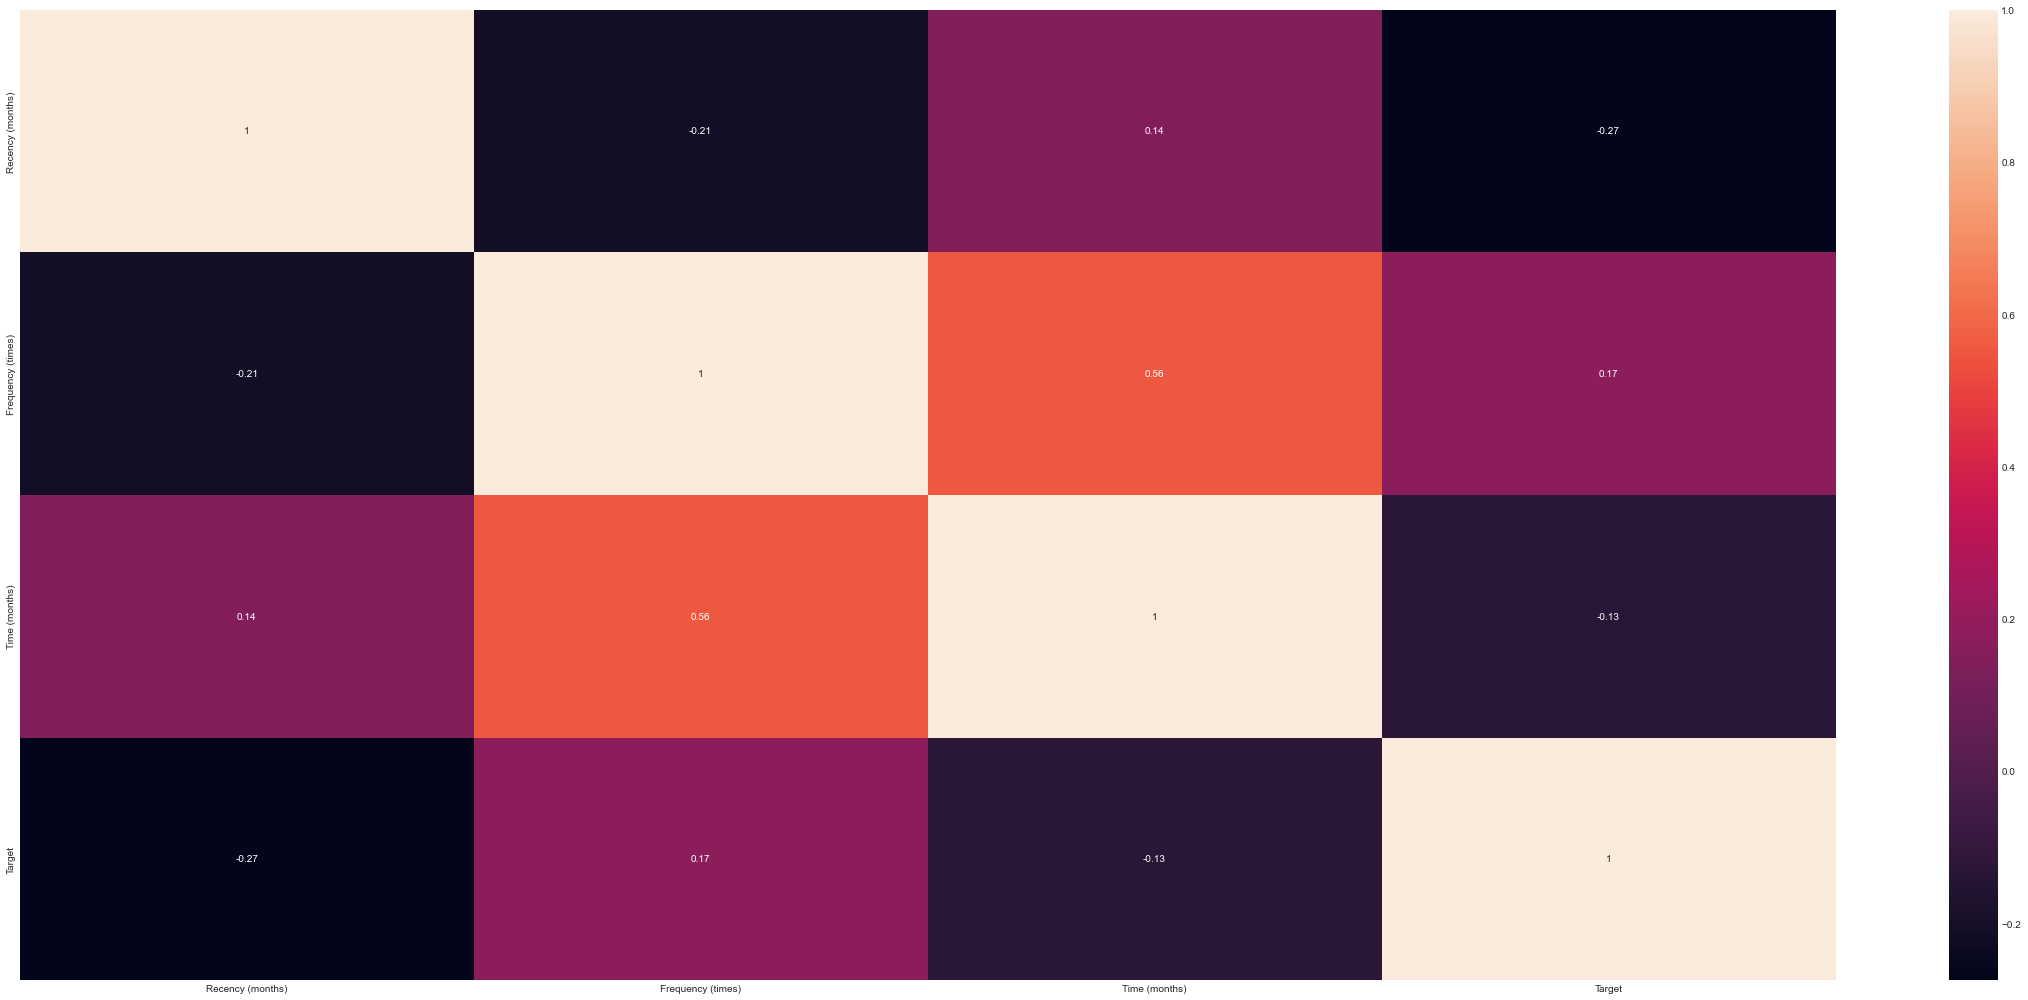

In [16]:
plt.figure(figsize=(32, 14))
heatmap = sns.heatmap(df.corr(), annot=True)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        همانطور که میبینید، بین Recency (months) و Target رابطه معنا دار قوی تری وجود دارد. 

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        <br>
        اکنون برای سهولت در کار با دیتا ها، ویژگی هایمان(به غیر از لیبل تارگت) را با تابع sklearn.preprocessing.StandardScalar نرمال سازی میکنیم.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Recency (months)', 'Frequency (times)', 'Time (months)']] = scaler.fit_transform(df[['Recency (months)', 'Frequency (times)' 
                                                                                                   , 'Time (months)']])

In [18]:
df.head()

,Recency (months),Frequency (times),Time (months),Target
0,-0.913378,6.870514,2.393118,1
1,-1.156005,0.959966,-0.614604,1
2,-1.034691,1.439200,-0.313832,1
3,-0.913378,2.078178,0.115843,1
4,-1.034691,2.717156,1.490801,0


<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        نرمال سازی داده ها انجام شده و برای ادامه تحلیل دیتاست، نمودار pairplot را با استفاده از کتابخانه seaborn ترسیم میکنیم.

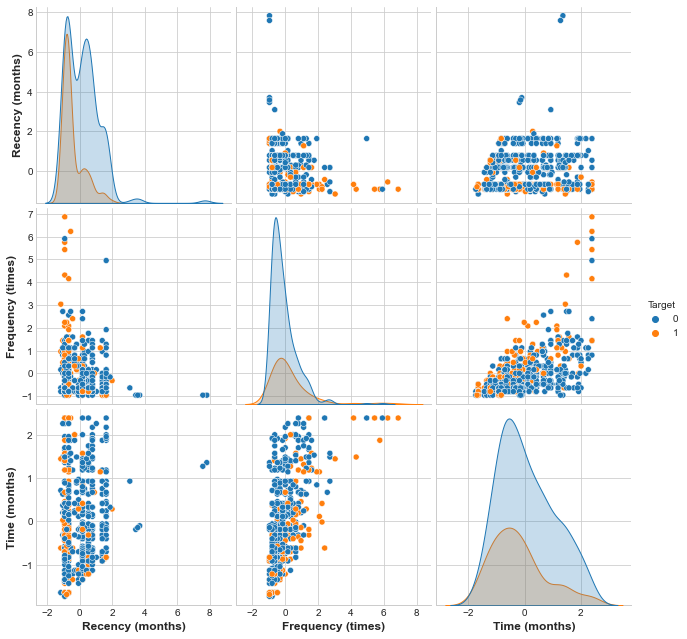

In [19]:
sns.pairplot(df, hue="Target", height=3)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        با این کار, scatterplot دو به دوی ویژگی هارا با hue=Target رسم کردیم و با توجه به نمودار ها میتوان گفت که Target را با ۲ ویژگی T و F بهتر میتوان تفکیک کرد. داریم: 

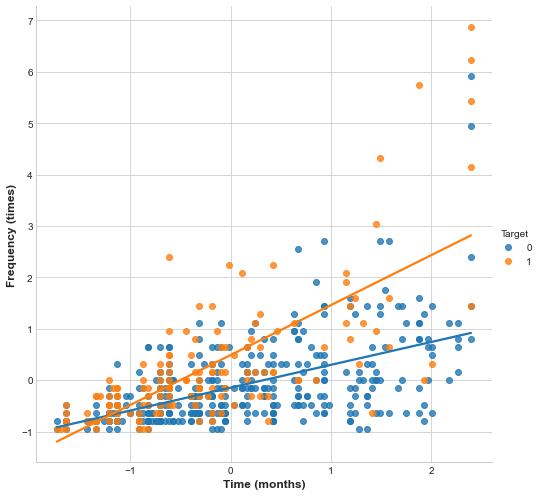

In [20]:
sns.lmplot(x="Time (months)", y="Frequency (times)", 
           hue="Target",
           ci=None,
           data=df,
           height=7)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        خطوط رگرسیون خطی را برای هر کدام از کلاس ها نیز رسم کردیم.


<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        اکنون نمودار جعبه ای ویژگی ها را رسم میکنیم و پس از آن مقدار Q3-Q1 را برای هر کدام از ۳ ویژگی مان بدست می آوریم:

<AxesSubplot:>

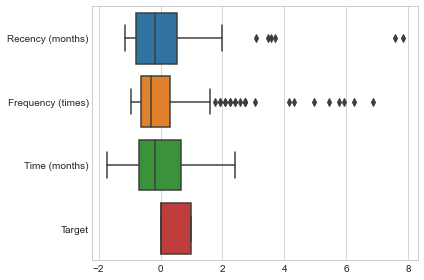

In [21]:
sns.boxplot(data=df, orient='h')

In [22]:
df['Time (months)'].quantile(0.75) - df['Time (months)'].quantile(0.25)

1.3749585879689779

In [23]:
df['Recency (months)'].quantile(0.75) - df['Recency (months)'].quantile(0.25)

1.3344467759990735

In [24]:
df['Frequency (times)'].quantile(0.75) - df['Frequency (times)'].quantile(0.25)

0.9584673187669093

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        همانطور که میبینید، گستره نمودار جعبه ای  ۲ ویژگی Recency و Time  تقریبا برابر است. از طرفی هم میدانیم هر چه این مقدار گستره برای ویژگی ای بیشتر باشد، آن ویژگی، گزینه بهتری برای classification میباشد.
        <br>
        پیش تر با بررسی ضرایب همبستگی ویژگی ها، متوجه شدیم ویژگی <strong>Recency</strong>، همبستگی بیشتری با Target دارد. پس می توان گفت این ویژگی برای classification کلاس هایمان بهتر است. داریم:

<AxesSubplot:xlabel='Recency (months)', ylabel='Target'>

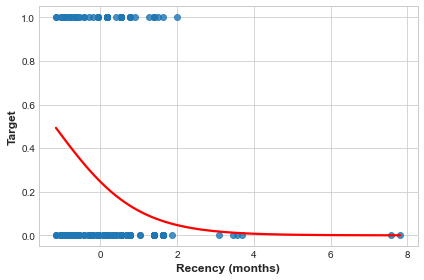

In [25]:
sns.regplot(data = df, x='Recency (months)', y='Target', logistic=True, ci=None, line_kws={'color': 'red'})